In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import re
from os.path import isfile

In [2]:
from skimage import filters
from skimage.feature import corner_harris, corner_peaks
from scipy import ndimage
from skimage.filters import threshold_otsu, threshold_local
from skimage import feature
import numpy as np

In [3]:
data1 = np.load("pac_data/02/0/20160930_082811_796.npz")
img1 = data1['x'].astype(np.float32)
img_med1 = ndimage.median_filter(img1, 4)
binary_mask_temp = img_med1 > 0.1
img_med1[binary_mask_temp==0] = (np.sum(img_med1) * 1.0) / (240.0 * 320.0)
img_med1 = ndimage.median_filter(img_med1, 4)

In [4]:
print(np.amax(img_med1))
print(np.amin(img_med1))

2.5097656
0.86279297


In [5]:
img_med1_normalized_image = np.copy(img_med1)

In [6]:
for r in range(0, len(img_med1)):
    for c in range(0, len(img_med1[0])):
        average = (np.amax(img_med1) + np.amin(img_med1)) / 2.0
        new_range  = (np.amax(img_med1) - np.amin(img_med1)) / 2.0
        normalized_x = (img_med1[r][c] - average) / new_range
        img_med1_normalized_image[r][c] = normalized_x

In [7]:
print(np.amax(img_med1_normalized_image))
print(np.amin(img_med1_normalized_image))

1.0
-1.0


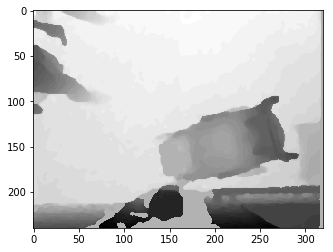

In [8]:
plt.imshow(img_med1_normalized_image, cmap=plt.cm.gray)

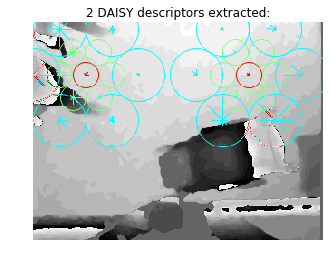

In [9]:
from skimage.feature import daisy
from skimage import data
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
descs, descs_img = daisy(img_med1_normalized_image, step=180, radius=58, rings=2, histograms=6,
                         orientations=8, visualize=True)

fig, ax = plt.subplots()
ax.axis('off')
ax.imshow(descs_img)
descs_num = descs.shape[0] * descs.shape[1]
ax.set_title('%i DAISY descriptors extracted:' % descs_num)
plt.show()

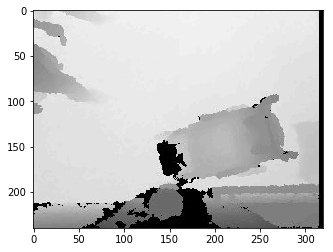

In [10]:
plt.imshow(img1, cmap=plt.cm.gray)

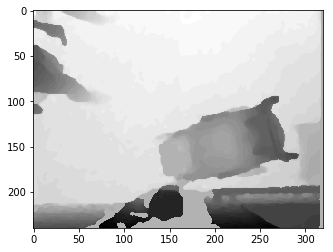

In [11]:
plt.imshow(img_med1, cmap=plt.cm.gray)

1.6074219
11
0
*****
ADFADFADFASDFASDF
1.6074219
ADFADSFASDFSFASDf
1.6074219
11
1
*****
ADFADFADFASDFASDF
1.6074219
ADFADSFASDFSFASDf
1.6474609
11
2
*****
ADFADFADFASDFASDF
1.6474609
ADFADSFASDFSFASDf
1.6474609
11
3
*****
ADFADFADFASDFASDF
1.6474609
ADFADSFASDFSFASDf
1.5683594
12
0
*****
ADFADFADFASDFASDF
1.5683594
ADFADSFASDFSFASDf
1.5683594
12
1
*****
ADFADFADFASDFASDF
1.5683594
ADFADSFASDFSFASDf
1.6074219
12
2
*****
ADFADFADFASDFASDF
1.6074219
ADFADSFASDFSFASDf
1.6074219
12
3
*****
ADFADFADFASDFASDF
1.6074219
ADFADSFASDFSFASDf
1.6474609
12
4
*****
ADFADFADFASDFASDF
1.6474609
ADFADSFASDFSFASDf


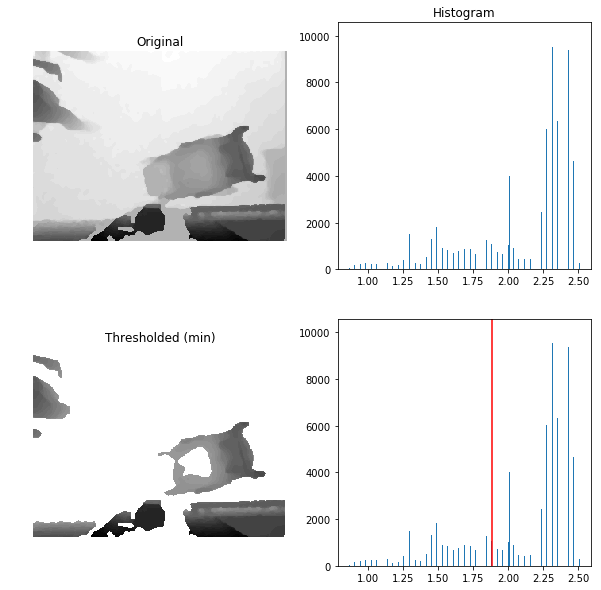

In [12]:
from skimage.filters import threshold_otsu

thresh_min = threshold_otsu(img_med1)
binary_min = img_med1 > thresh_min

new_img_med1 = np.copy(binary_min).astype(np.float32)

counter = 0
counter2 = 0
for r_binary in range(0, len(binary_min)):
    for c_binary in range(0, len(binary_min[0])):
        if binary_min[r_binary][c_binary] == False:
            counter += 1
            if counter < 10:
                print(img_med1[r_binary][c_binary])
                print(r_binary)
                print(c_binary)
                print("*****")
                new_img_med1[r_binary][c_binary] = img_med1[r_binary][c_binary]
                print("ADFADFADFASDFASDF")
                print(new_img_med1[r_binary][c_binary])
                print("ADFADSFASDFSFASDf")
            else:
                new_img_med1[r_binary][c_binary] = img_med1[r_binary][c_binary]
        else:
            new_img_med1[r_binary][c_binary] = np.amax(img_med1)

fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].imshow(img_med1, cmap=plt.cm.gray)
ax[0, 0].set_title('Original')

ax[0, 1].hist(img_med1.ravel(), bins=256)
ax[0, 1].set_title('Histogram')


ax[1, 0].imshow(new_img_med1, cmap=plt.cm.gray)
ax[1, 0].set_title('Thresholded (min)')

ax[1, 1].hist(img_med1.ravel(), bins=256)
ax[1, 1].axvline(thresh_min, color='r')


for a in ax[:, 0]:
    a.axis('off')
plt.show()

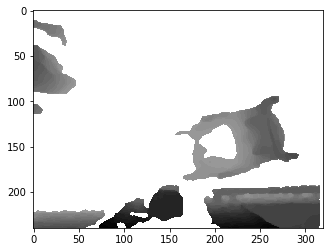

In [13]:
plt.imshow(new_img_med1, cmap=plt.cm.gray)


True


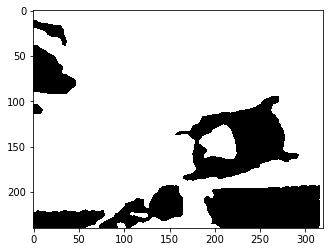

In [15]:
plt.imshow(binary_min, cmap=plt.cm.gray)
print(binary_min[0][0])

In [69]:
data1 = np.load("pac_data/04/0/20160930_082810_537.npz")
img1 = data1['x'].astype(np.float32)
img_med1 = ndimage.median_filter(img1, 4)
binary_mask_temp = img_med1 > 0.1
img_med1[binary_mask_temp==0] = (np.sum(img_med1) * 1.0) / (240.0 * 320.0)
img_med1 = ndimage.median_filter(img_med1, 4)

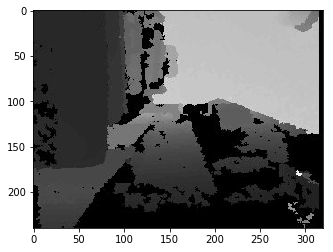

In [70]:
plt.imshow(img1, cmap=plt.cm.gray)

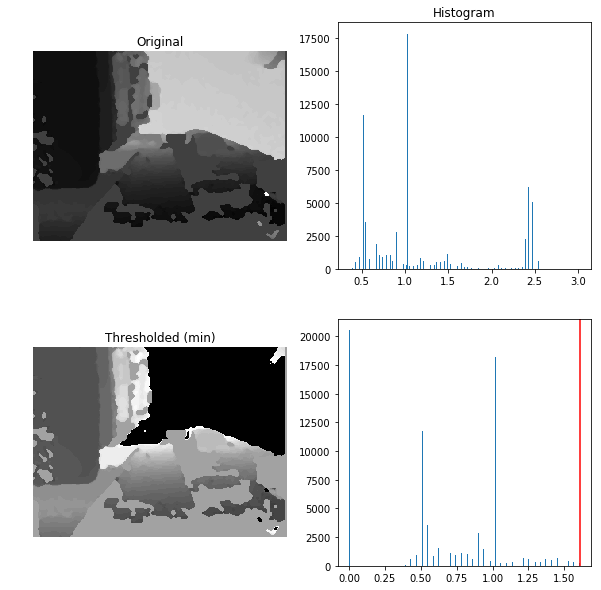

In [71]:
from skimage.filters import threshold_otsu

thresh_min = threshold_otsu(img_med1)
binary_min = img_med1 > thresh_min

fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].imshow(img_med1, cmap=plt.cm.gray)
ax[0, 0].set_title('Original')

ax[0, 1].hist(img_med1.ravel(), bins=256)
ax[0, 1].set_title('Histogram')

img_med1[binary_min==1] = 0 
ax[1, 0].imshow(img_med1, cmap=plt.cm.gray)
ax[1, 0].set_title('Thresholded (min)')

ax[1, 1].hist(img_med1.ravel(), bins=256)
ax[1, 1].axvline(thresh_min, color='r')

for a in ax[:, 0]:
    a.axis('off')
plt.show()

In [72]:
data1 = np.load("pac_data/04/1/20160930_082850_821.npz")
img1 = data1['x'].astype(np.float32)
img_med1 = ndimage.median_filter(img1, 4)
binary_mask_temp = img_med1 > 0.1
img_med1[binary_mask_temp==0] = (np.sum(img_med1) * 1.0) / (240.0 * 320.0)
img_med1 = ndimage.median_filter(img_med1, 4)

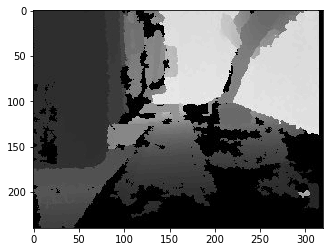

In [73]:
plt.imshow(img1, cmap=plt.cm.gray)

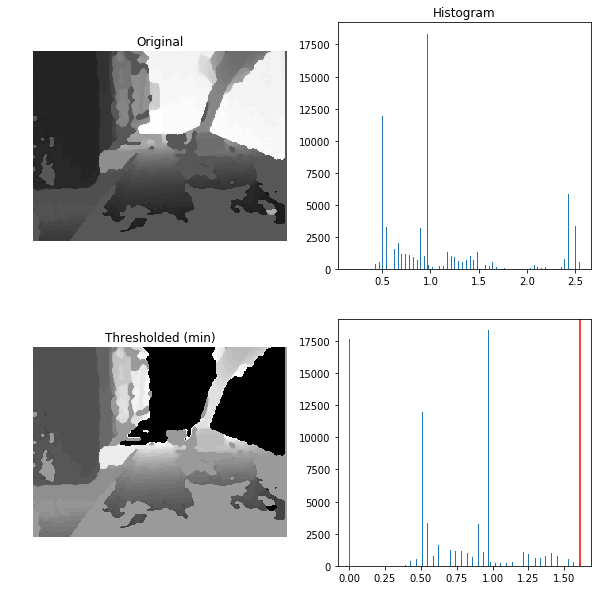

In [74]:
from skimage.filters import threshold_otsu

thresh_min = threshold_otsu(img_med1)
binary_min = img_med1 > thresh_min

fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].imshow(img_med1, cmap=plt.cm.gray)
ax[0, 0].set_title('Original')

ax[0, 1].hist(img_med1.ravel(), bins=256)
ax[0, 1].set_title('Histogram')

img_med1[binary_min==1] = 0 
ax[1, 0].imshow(img_med1, cmap=plt.cm.gray)
ax[1, 0].set_title('Thresholded (min)')

ax[1, 1].hist(img_med1.ravel(), bins=256)
ax[1, 1].axvline(thresh_min, color='r')

for a in ax[:, 0]:
    a.axis('off')
plt.show()

In [14]:
data1 = np.load("pac_data/06/1/20161213_205550_141.npz")
img1 = data1['x'].astype(np.float32)
img_med1 = ndimage.median_filter(img1, 4)
binary_mask_temp = img_med1 > 0.1
img_med1[binary_mask_temp==0] = (np.sum(img_med1) * 1.0) / (240.0 * 320.0)
img_med1 = ndimage.median_filter(img_med1, 4)

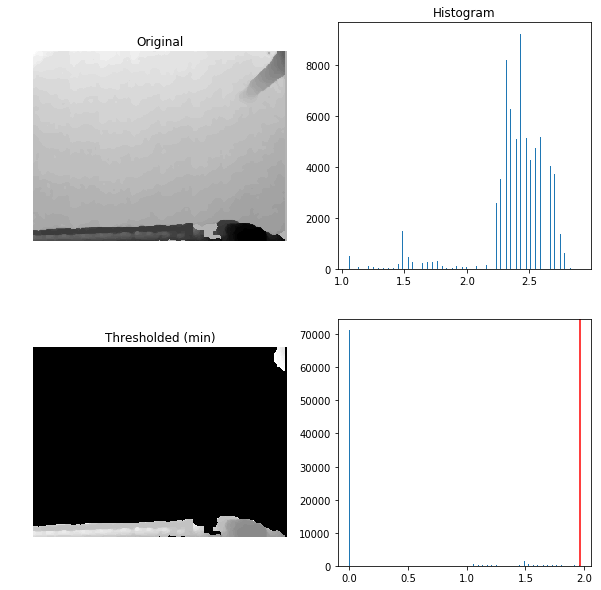

In [15]:
from skimage.filters import threshold_otsu

thresh_min = threshold_otsu(img_med1)
binary_min = img_med1 > thresh_min

fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].imshow(img_med1, cmap=plt.cm.gray)
ax[0, 0].set_title('Original')

ax[0, 1].hist(img_med1.ravel(), bins=256)
ax[0, 1].set_title('Histogram')

img_med1[binary_min==1] = 0 
ax[1, 0].imshow(img_med1, cmap=plt.cm.gray)
ax[1, 0].set_title('Thresholded (min)')

ax[1, 1].hist(img_med1.ravel(), bins=256)
ax[1, 1].axvline(thresh_min, color='r')

for a in ax[:, 0]:
    a.axis('off')
plt.show()

In [3]:
data1 = np.load("pac_data/62/0/20160930_083105_378.npz")
img1 = data1['x'].astype(np.float32)
img_med1 = ndimage.median_filter(img1, 4)
binary_mask_temp = img_med1 > 0.1
img_med1[binary_mask_temp==0] = (np.sum(img_med1) * 1.0) / (240.0 * 320.0)
img_med1 = ndimage.median_filter(img_med1, 4)

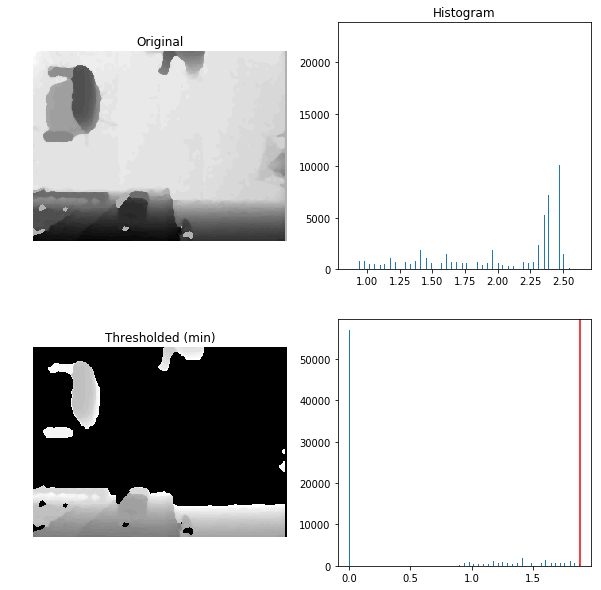

In [4]:
from skimage.filters import threshold_otsu

thresh_min = threshold_otsu(img_med1)
binary_min = img_med1 > thresh_min

fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].imshow(img_med1, cmap=plt.cm.gray)
ax[0, 0].set_title('Original')

ax[0, 1].hist(img_med1.ravel(), bins=256)
ax[0, 1].set_title('Histogram')

img_med1[binary_min==1] = 0 
ax[1, 0].imshow(img_med1, cmap=plt.cm.gray)
ax[1, 0].set_title('Thresholded (min)')

ax[1, 1].hist(img_med1.ravel(), bins=256)
ax[1, 1].axvline(thresh_min, color='r')

for a in ax[:, 0]:
    a.axis('off')
plt.show()

In [7]:
data1 = np.load("pac_data/62/1/20160930_084333_110.npz")
img1 = data1['x'].astype(np.float32)
img_med1 = ndimage.median_filter(img1, 4)
binary_mask_temp = img_med1 > 0.1
img_med1[binary_mask_temp==0] = (np.sum(img_med1) * 1.0) / (240.0 * 320.0)
img_med1 = ndimage.median_filter(img_med1, 4)

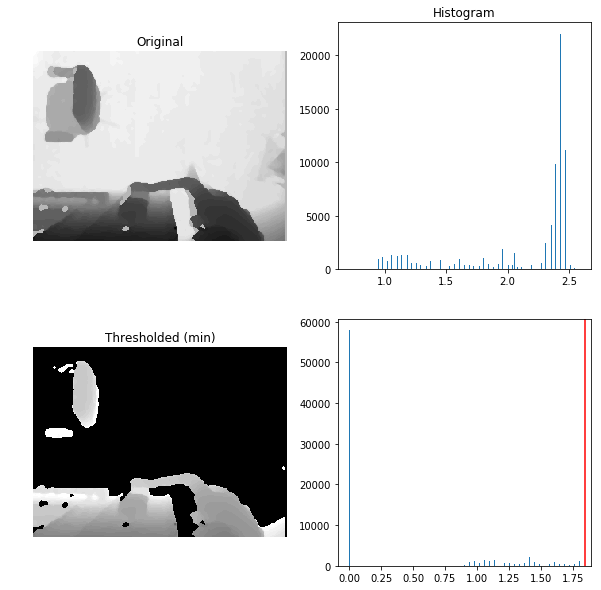

In [8]:
from skimage.filters import threshold_otsu

thresh_min = threshold_otsu(img_med1)
binary_min = img_med1 > thresh_min

fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].imshow(img_med1, cmap=plt.cm.gray)
ax[0, 0].set_title('Original')

ax[0, 1].hist(img_med1.ravel(), bins=256)
ax[0, 1].set_title('Histogram')

img_med1[binary_min==1] = 0 
ax[1, 0].imshow(img_med1, cmap=plt.cm.gray)
ax[1, 0].set_title('Thresholded (min)')

ax[1, 1].hist(img_med1.ravel(), bins=256)
ax[1, 1].axvline(thresh_min, color='r')

for a in ax[:, 0]:
    a.axis('off')
plt.show()

In [14]:
import os
import re
pac_data_directory = "pac_data" #Directory of raw numpy images
potential_sensor_directories = os.listdir(pac_data_directory)
sensor_directories = [sensor_dir for sensor_dir in potential_sensor_directories if os.path.isdir(pac_data_directory + "/" + sensor_dir)]

In [15]:
print(sensor_directories)

['02', '04', '06', '08', '10', '11', '15', '21', '22', '23', '24', '39', '52', '59', '62', '63', '72']


In [16]:
sensor_directory_to_list_of_filenames_of_images_labeled_zero_dict = {}
sensor_directory_to_list_of_filenames_of_images_labeled_one_dict = {}
pattern = r"\d{8}_\d{6}_\d{3}.npz"
for sensor_dir in sensor_directories:
    if os.path.isdir(pac_data_directory + "/" + sensor_dir + "/0"):
        potential_filenames_of_images_labeled_with_zero = os.listdir(pac_data_directory + "/" + sensor_dir + "/0")
        filenames_of_images_labeled_with_zero = [pac_data_directory + "/" + sensor_dir + "/0/" + f for f in potential_filenames_of_images_labeled_with_zero if os.path.isfile(pac_data_directory + "/" + sensor_dir + "/0/" + f) and re.match(pattern, f)]
        sensor_directory_to_list_of_filenames_of_images_labeled_zero_dict[sensor_dir] = filenames_of_images_labeled_with_zero
    if os.path.isdir(pac_data_directory + "/" + sensor_dir + "/1"):
        potential_filenames_of_images_labeled_with_one =  os.listdir(pac_data_directory + "/" + sensor_dir + "/1")
        filenames_of_images_labeled_with_one = [pac_data_directory + "/" + sensor_dir + "/1/" + f for f in potential_filenames_of_images_labeled_with_one if os.path.isfile(pac_data_directory + "/" + sensor_dir + "/1/" + f) and re.match(pattern, f)]
        sensor_directory_to_list_of_filenames_of_images_labeled_one_dict[sensor_dir] = filenames_of_images_labeled_with_one

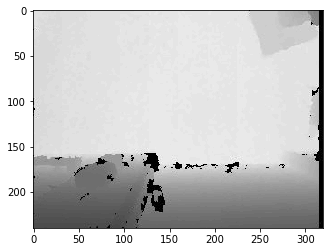

In [24]:
import numpy as np
filename = sensor_directory_to_list_of_filenames_of_images_labeled_zero_dict['63'][0]
print(filename)
data1 = np.load(filename)
img1 = data1['x'].astype(np.float32)
plt.imshow(img1, cmap=plt.cm.gray)

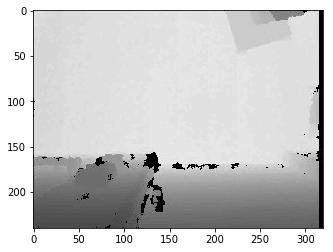

In [27]:
filename = sensor_directory_to_list_of_filenames_of_images_labeled_zero_dict['63'][1]
print(filename)
data1 = np.load(filename)
img1 = data1['x'].astype(np.float32)
plt.imshow(img1, cmap=plt.cm.gray)

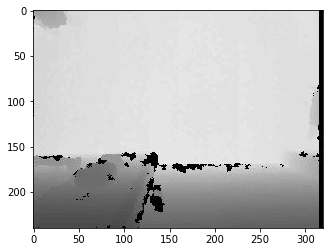

In [28]:
filename = sensor_directory_to_list_of_filenames_of_images_labeled_zero_dict['63'][2]
print(filename)
data1 = np.load(filename)
img1 = data1['x'].astype(np.float32)
plt.imshow(img1, cmap=plt.cm.gray)

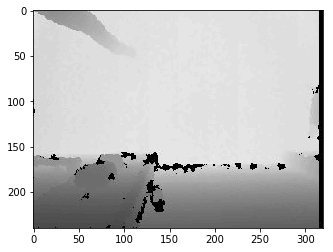

In [29]:
filename = sensor_directory_to_list_of_filenames_of_images_labeled_zero_dict['63'][3]
print(filename)
data1 = np.load(filename)
img1 = data1['x'].astype(np.float32)
plt.imshow(img1, cmap=plt.cm.gray)

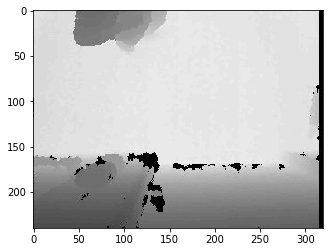

In [30]:
filename = sensor_directory_to_list_of_filenames_of_images_labeled_zero_dict['63'][4]
print(filename)
data1 = np.load(filename)
img1 = data1['x'].astype(np.float32)
plt.imshow(img1, cmap=plt.cm.gray)

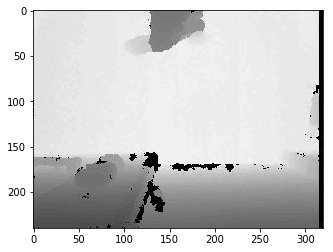

In [31]:
filename = sensor_directory_to_list_of_filenames_of_images_labeled_zero_dict['63'][5]
print(filename)
data1 = np.load(filename)
img1 = data1['x'].astype(np.float32)
plt.imshow(img1, cmap=plt.cm.gray)

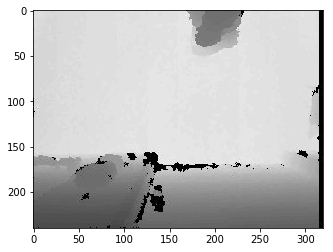

In [32]:
filename = sensor_directory_to_list_of_filenames_of_images_labeled_zero_dict['63'][6]
print(filename)
data1 = np.load(filename)
img1 = data1['x'].astype(np.float32)
plt.imshow(img1, cmap=plt.cm.gray)

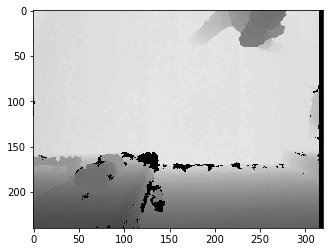

In [33]:
filename = sensor_directory_to_list_of_filenames_of_images_labeled_zero_dict['63'][7]
print(filename)
data1 = np.load(filename)
img1 = data1['x'].astype(np.float32)
plt.imshow(img1, cmap=plt.cm.gray)

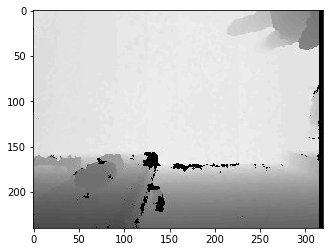

In [34]:
filename = sensor_directory_to_list_of_filenames_of_images_labeled_zero_dict['63'][8]
print(filename)
data1 = np.load(filename)
img1 = data1['x'].astype(np.float32)
plt.imshow(img1, cmap=plt.cm.gray)

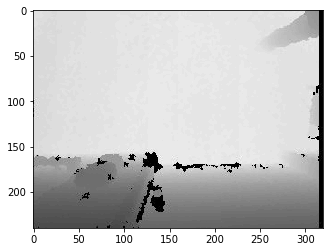

In [35]:
filename = sensor_directory_to_list_of_filenames_of_images_labeled_zero_dict['63'][9]
print(filename)
data1 = np.load(filename)
img1 = data1['x'].astype(np.float32)
plt.imshow(img1, cmap=plt.cm.gray)

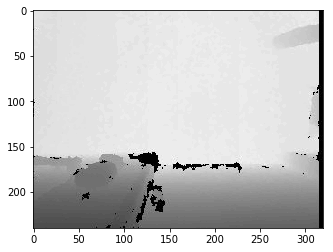

In [36]:
filename = sensor_directory_to_list_of_filenames_of_images_labeled_zero_dict['63'][10]
print(filename)
data1 = np.load(filename)
img1 = data1['x'].astype(np.float32)
plt.imshow(img1, cmap=plt.cm.gray)

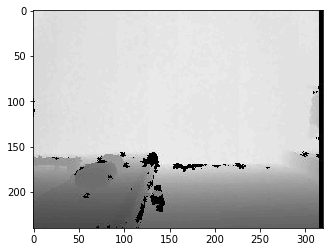

In [37]:
filename = sensor_directory_to_list_of_filenames_of_images_labeled_zero_dict['63'][11]
print(filename)
data1 = np.load(filename)
img1 = data1['x'].astype(np.float32)
plt.imshow(img1, cmap=plt.cm.gray)

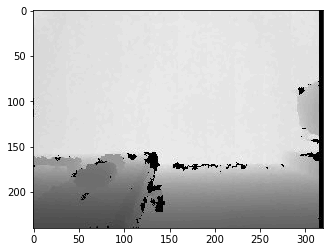

In [38]:
filename = sensor_directory_to_list_of_filenames_of_images_labeled_zero_dict['63'][12]
print(filename)
data1 = np.load(filename)
img1 = data1['x'].astype(np.float32)
plt.imshow(img1, cmap=plt.cm.gray)

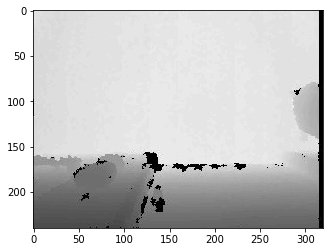

In [39]:
filename = sensor_directory_to_list_of_filenames_of_images_labeled_zero_dict['63'][13]
print(filename)
data1 = np.load(filename)
img1 = data1['x'].astype(np.float32)
plt.imshow(img1, cmap=plt.cm.gray)

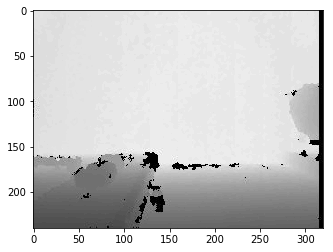

In [40]:
filename = sensor_directory_to_list_of_filenames_of_images_labeled_zero_dict['63'][14]
print(filename)
data1 = np.load(filename)
img1 = data1['x'].astype(np.float32)
plt.imshow(img1, cmap=plt.cm.gray)

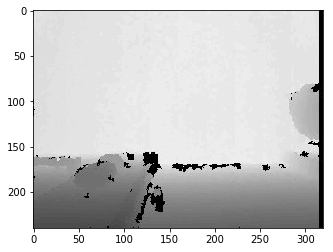

In [41]:
filename = sensor_directory_to_list_of_filenames_of_images_labeled_zero_dict['63'][15]
print(filename)
data1 = np.load(filename)
img1 = data1['x'].astype(np.float32)
plt.imshow(img1, cmap=plt.cm.gray)

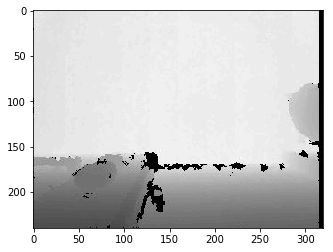

In [42]:
filename = sensor_directory_to_list_of_filenames_of_images_labeled_zero_dict['63'][16]
print(filename)
data1 = np.load(filename)
img1 = data1['x'].astype(np.float32)
plt.imshow(img1, cmap=plt.cm.gray)

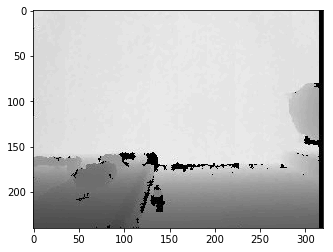

In [43]:
filename = sensor_directory_to_list_of_filenames_of_images_labeled_zero_dict['63'][17]
print(filename)
data1 = np.load(filename)
img1 = data1['x'].astype(np.float32)
plt.imshow(img1, cmap=plt.cm.gray)

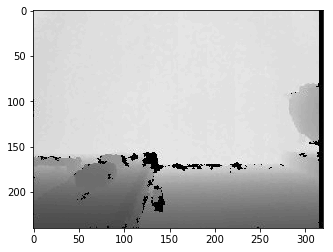

In [44]:
filename = sensor_directory_to_list_of_filenames_of_images_labeled_zero_dict['63'][18]
print(filename)
data1 = np.load(filename)
img1 = data1['x'].astype(np.float32)
plt.imshow(img1, cmap=plt.cm.gray)

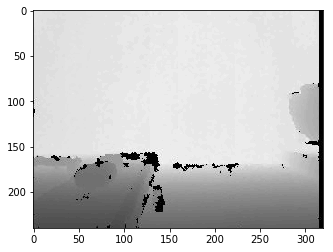

In [45]:
filename = sensor_directory_to_list_of_filenames_of_images_labeled_zero_dict['63'][19]
print(filename)
data1 = np.load(filename)
img1 = data1['x'].astype(np.float32)
plt.imshow(img1, cmap=plt.cm.gray)

pac_data/63/0/20160930_083258_406.npz


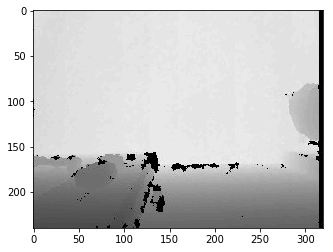

In [76]:
filename = sensor_directory_to_list_of_filenames_of_images_labeled_zero_dict['63'][20]
print(filename)
data1 = np.load(filename)
img1 = data1['x'].astype(np.float32)
plt.imshow(img1, cmap=plt.cm.gray)

pac_data/63/0/20160930_083258_605.npz


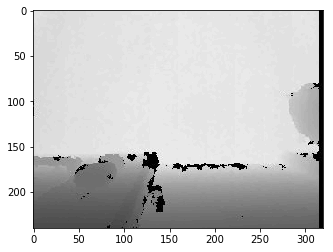

In [77]:
filename = sensor_directory_to_list_of_filenames_of_images_labeled_zero_dict['63'][21]
print(filename)
data1 = np.load(filename)
img1 = data1['x'].astype(np.float32)
plt.imshow(img1, cmap=plt.cm.gray)

pac_data/63/0/20160930_083258_806.npz


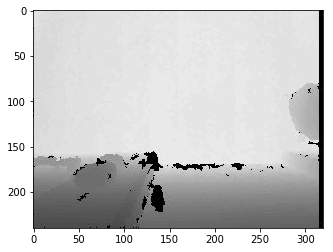

In [78]:
filename = sensor_directory_to_list_of_filenames_of_images_labeled_zero_dict['63'][22]
print(filename)
data1 = np.load(filename)
img1 = data1['x'].astype(np.float32)
plt.imshow(img1, cmap=plt.cm.gray)

pac_data/63/0/20160930_083259_042.npz


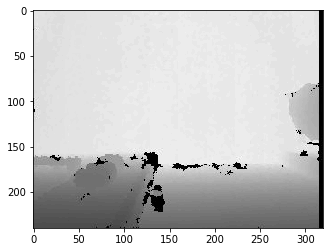

In [79]:
filename = sensor_directory_to_list_of_filenames_of_images_labeled_zero_dict['63'][23]
print(filename)
data1 = np.load(filename)
img1 = data1['x'].astype(np.float32)
plt.imshow(img1, cmap=plt.cm.gray)

pac_data/63/0/20160930_083259_309.npz


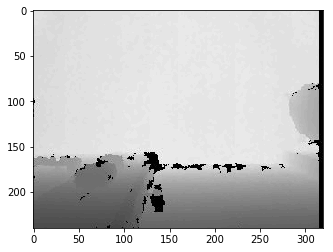

In [80]:
filename = sensor_directory_to_list_of_filenames_of_images_labeled_zero_dict['63'][24]
print(filename)
data1 = np.load(filename)
img1 = data1['x'].astype(np.float32)
plt.imshow(img1, cmap=plt.cm.gray)

pac_data/63/0/20160930_083259_510.npz


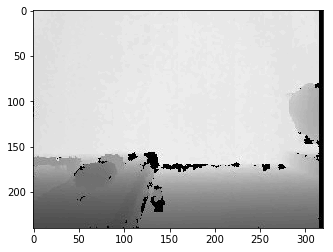

In [81]:
filename = sensor_directory_to_list_of_filenames_of_images_labeled_zero_dict['63'][25]
print(filename)
data1 = np.load(filename)
img1 = data1['x'].astype(np.float32)
plt.imshow(img1, cmap=plt.cm.gray)

pac_data/63/0/20160930_083259_810.npz


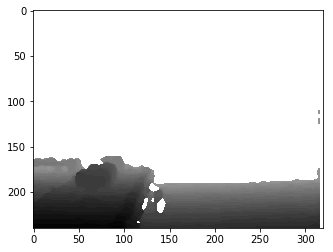

In [97]:
from skimage.filters import threshold_otsu

filename = sensor_directory_to_list_of_filenames_of_images_labeled_zero_dict['63'][26]

data1 = np.load(filename)
img1 = data1['x'].astype(np.float32)
img_med1 = ndimage.median_filter(img1, 4)
binary_mask_temp = img_med1 > 0.1
img_med1[binary_mask_temp==0] = (np.sum(img_med1) * 1.0) / (240.0 * 320.0)
img_med1 = ndimage.median_filter(img_med1, 4)
print(filename)

thresh_min = threshold_otsu(img_med1)
binary_min = img_med1 > thresh_min

new_img_med1 = np.copy(binary_min).astype(np.float32)

counter = 0
counter2 = 0
for r_binary in range(0, len(binary_min)):
    for c_binary in range(0, len(binary_min[0])):
        if binary_min[r_binary][c_binary] == False:
            counter += 1
            new_img_med1[r_binary][c_binary] = img_med1[r_binary][c_binary]
        else:
            new_img_med1[r_binary][c_binary] = np.amax(img_med1)
plt.imshow(new_img_med1, cmap=plt.cm.gray)

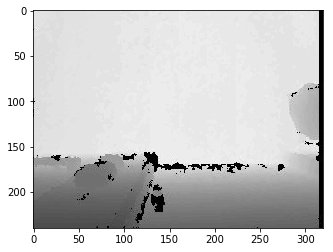

In [53]:
filename = sensor_directory_to_list_of_filenames_of_images_labeled_zero_dict['63'][27]
data1 = np.load(filename)
img1 = data1['x'].astype(np.float32)
plt.imshow(img1, cmap=plt.cm.gray)

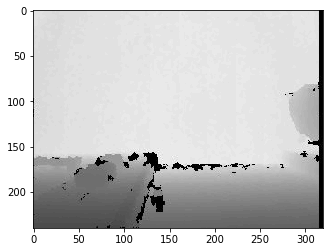

In [54]:
filename = sensor_directory_to_list_of_filenames_of_images_labeled_zero_dict['63'][28]
data1 = np.load(filename)
img1 = data1['x'].astype(np.float32)
plt.imshow(img1, cmap=plt.cm.gray)

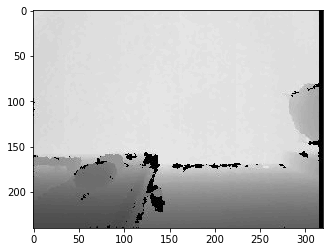

In [55]:
filename = sensor_directory_to_list_of_filenames_of_images_labeled_zero_dict['63'][29]
data1 = np.load(filename)
img1 = data1['x'].astype(np.float32)
plt.imshow(img1, cmap=plt.cm.gray)

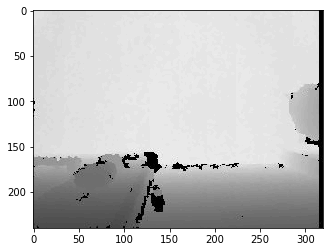

In [56]:
filename = sensor_directory_to_list_of_filenames_of_images_labeled_zero_dict['63'][30]
data1 = np.load(filename)
img1 = data1['x'].astype(np.float32)
plt.imshow(img1, cmap=plt.cm.gray)

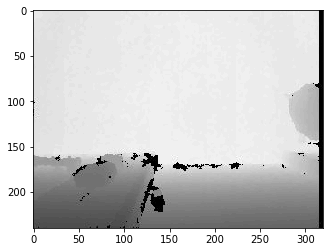

In [57]:
filename = sensor_directory_to_list_of_filenames_of_images_labeled_zero_dict['63'][31]
data1 = np.load(filename)
img1 = data1['x'].astype(np.float32)
plt.imshow(img1, cmap=plt.cm.gray)

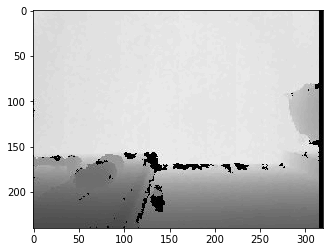

In [58]:
filename = sensor_directory_to_list_of_filenames_of_images_labeled_zero_dict['63'][32]
data1 = np.load(filename)
img1 = data1['x'].astype(np.float32)
plt.imshow(img1, cmap=plt.cm.gray)

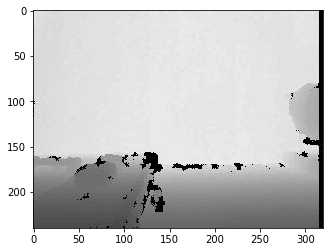

In [59]:
filename = sensor_directory_to_list_of_filenames_of_images_labeled_zero_dict['63'][33]
data1 = np.load(filename)
img1 = data1['x'].astype(np.float32)
plt.imshow(img1, cmap=plt.cm.gray)

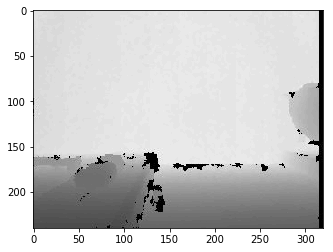

In [60]:
filename = sensor_directory_to_list_of_filenames_of_images_labeled_zero_dict['63'][34]
data1 = np.load(filename)
img1 = data1['x'].astype(np.float32)
plt.imshow(img1, cmap=plt.cm.gray)

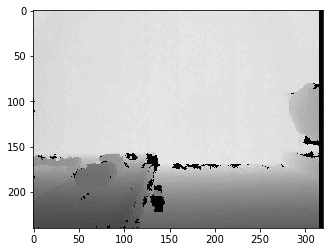

In [61]:
filename = sensor_directory_to_list_of_filenames_of_images_labeled_zero_dict['63'][35]
data1 = np.load(filename)
img1 = data1['x'].astype(np.float32)
plt.imshow(img1, cmap=plt.cm.gray)

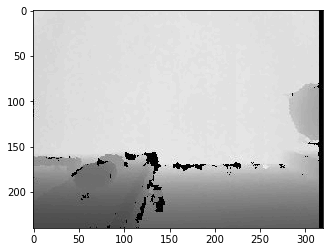

In [62]:
filename = sensor_directory_to_list_of_filenames_of_images_labeled_zero_dict['63'][36]
data1 = np.load(filename)
img1 = data1['x'].astype(np.float32)
plt.imshow(img1, cmap=plt.cm.gray)

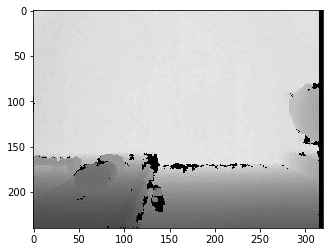

In [63]:
filename = sensor_directory_to_list_of_filenames_of_images_labeled_zero_dict['63'][37]
data1 = np.load(filename)
img1 = data1['x'].astype(np.float32)
plt.imshow(img1, cmap=plt.cm.gray)

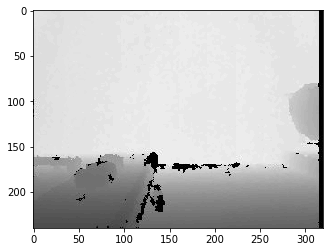

In [64]:
filename = sensor_directory_to_list_of_filenames_of_images_labeled_zero_dict['63'][38]
data1 = np.load(filename)
img1 = data1['x'].astype(np.float32)
plt.imshow(img1, cmap=plt.cm.gray)

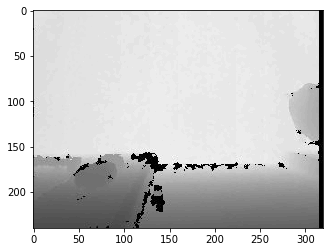

In [65]:
filename = sensor_directory_to_list_of_filenames_of_images_labeled_zero_dict['63'][39]
data1 = np.load(filename)
img1 = data1['x'].astype(np.float32)
plt.imshow(img1, cmap=plt.cm.gray)

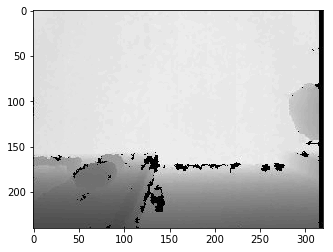

In [66]:
filename = sensor_directory_to_list_of_filenames_of_images_labeled_zero_dict['63'][40]
data1 = np.load(filename)
img1 = data1['x'].astype(np.float32)
plt.imshow(img1, cmap=plt.cm.gray)

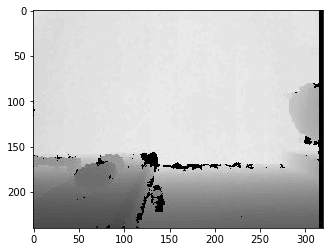

In [67]:
filename = sensor_directory_to_list_of_filenames_of_images_labeled_zero_dict['63'][41]
data1 = np.load(filename)
img1 = data1['x'].astype(np.float32)
plt.imshow(img1, cmap=plt.cm.gray)

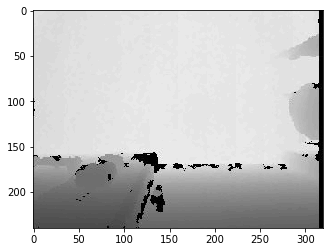

In [68]:
filename = sensor_directory_to_list_of_filenames_of_images_labeled_zero_dict['63'][42]
data1 = np.load(filename)
img1 = data1['x'].astype(np.float32)
plt.imshow(img1, cmap=plt.cm.gray)

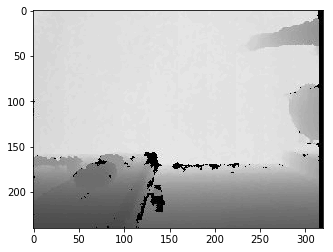

In [69]:
filename = sensor_directory_to_list_of_filenames_of_images_labeled_zero_dict['63'][43]
data1 = np.load(filename)
img1 = data1['x'].astype(np.float32)
plt.imshow(img1, cmap=plt.cm.gray)

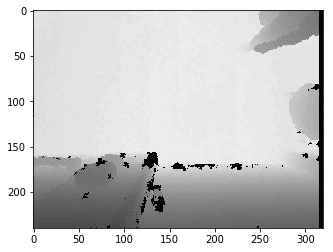

In [70]:
filename = sensor_directory_to_list_of_filenames_of_images_labeled_zero_dict['63'][44]
data1 = np.load(filename)
img1 = data1['x'].astype(np.float32)
plt.imshow(img1, cmap=plt.cm.gray)

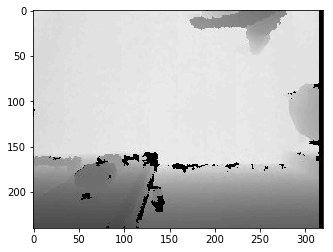

In [71]:
filename = sensor_directory_to_list_of_filenames_of_images_labeled_zero_dict['63'][45]
data1 = np.load(filename)
img1 = data1['x'].astype(np.float32)
plt.imshow(img1, cmap=plt.cm.gray)

pac_data/63/0/20160930_083304_014.npz


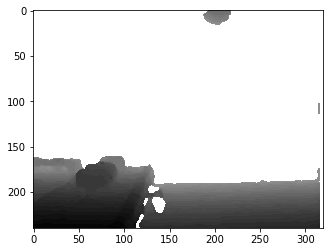

In [98]:
filename = sensor_directory_to_list_of_filenames_of_images_labeled_zero_dict['63'][46]
data1 = np.load(filename)
img1 = data1['x'].astype(np.float32)

from skimage.filters import threshold_otsu


img_med1 = ndimage.median_filter(img1, 4)
binary_mask_temp = img_med1 > 0.1
img_med1[binary_mask_temp==0] = (np.sum(img_med1) * 1.0) / (240.0 * 320.0)
img_med1 = ndimage.median_filter(img_med1, 4)
print(filename)

thresh_min = threshold_otsu(img_med1)
binary_min = img_med1 > thresh_min

new_img_med1 = np.copy(binary_min).astype(np.float32)

counter = 0
counter2 = 0
for r_binary in range(0, len(binary_min)):
    for c_binary in range(0, len(binary_min[0])):
        if binary_min[r_binary][c_binary] == False:
            counter += 1
            new_img_med1[r_binary][c_binary] = img_med1[r_binary][c_binary]
        else:
            new_img_med1[r_binary][c_binary] = np.amax(img_med1)
plt.imshow(new_img_med1, cmap=plt.cm.gray)

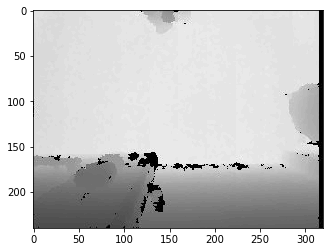

In [73]:
filename = sensor_directory_to_list_of_filenames_of_images_labeled_zero_dict['63'][47]
data1 = np.load(filename)
img1 = data1['x'].astype(np.float32)
plt.imshow(img1, cmap=plt.cm.gray)

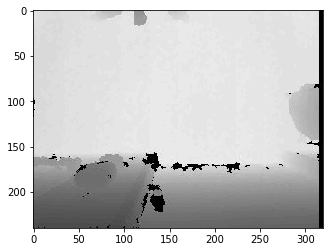

In [74]:
filename = sensor_directory_to_list_of_filenames_of_images_labeled_zero_dict['63'][48]
data1 = np.load(filename)
img1 = data1['x'].astype(np.float32)
plt.imshow(img1, cmap=plt.cm.gray)

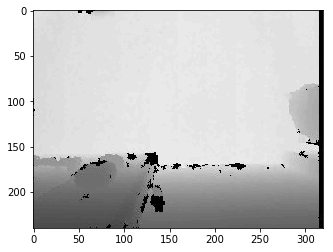

In [75]:
filename = sensor_directory_to_list_of_filenames_of_images_labeled_zero_dict['63'][49]
data1 = np.load(filename)
img1 = data1['x'].astype(np.float32)
plt.imshow(img1, cmap=plt.cm.gray)

In [ ]:
20160930_082811_796.npz

In [ ]:
20160930_082943_476.npz
